analysis of outliers

In [4]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64" , "int64"]) # Just Take variables of this type
df = df.dropna() #delete NAN
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df_table = df["table"]

In [6]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

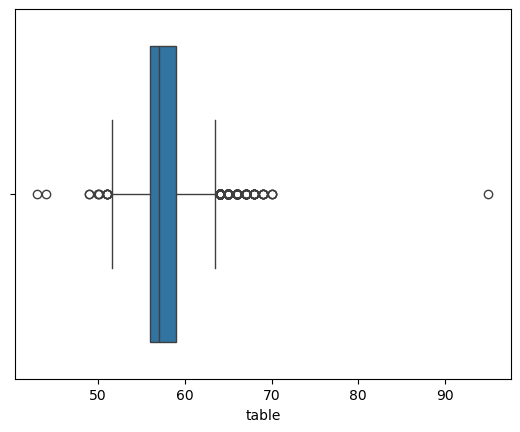

In [7]:
sns.boxplot(x = df_table);

In [8]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [9]:
Q1

56.0

In [10]:
Q3

59.0

In [11]:
IQR # it shows the disorganization of data

3.0

In [12]:
alt_sinir = Q1 - 1.5*IQR 
ust_sinir = Q3 + 1.5*IQR

In [16]:
alt_sinir 

51.5

In [19]:
ust_sinir

63.5

In [26]:
(df_table <alt_sinir ) | (df_table >ust_sinir )

0        False
1        False
2         True
3        False
4        False
         ...  
38121    False
38122    False
38123    False
38124    False
38125    False
Name: table, Length: 38126, dtype: bool

In [28]:
aykiri_tf = (df_table < alt_sinir)

In [30]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [32]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
Name: table, dtype: float64

In [34]:
df_table[aykiri_tf].index 

Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701, 25179,
       26387, 33586, 35633],
      dtype='int64')

### Delete

In [44]:
import pandas as pd 

In [46]:
type(df_table)

pandas.core.series.Series

In [48]:
df_table = pd.DataFrame(df_table)

In [50]:
df_table.shape

(38126, 1)

In [68]:
c_df = df_table[~((df_table < alt_sinir) | (df_table >ust_sinir)).any(axis = 1 )]

In [76]:
c_df.shape

(37743, 1)

In [78]:
df_table[aykiri_tf]

,table
1515,51.0
3238,50.1
3979,51.0
4150,51.0
5979,49.0
7418,50.0
8853,51.0
11368,43.0
22701,49.0
25179,50.0


In [87]:
df_table[aykiri_tf] = df_table.mean()

In [91]:
df_table[aykiri_tf] ### If you dont want to delete the outliers, you can replace them with the mean value.

,table
1515,57.533704
3238,57.533704
3979,57.533704
4150,57.533704
5979,57.533704
7418,57.533704
8853,57.533704
11368,57.533704
22701,57.533704
25179,57.533704


### SUPPRESSION METHOD

In [107]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64" , "int64"]) # Just Take variables of this type
df = df.dropna() #delete NAN
df.head() ##RESET DATASET

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [115]:
df_table = df["table"]

In [117]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
Name: table, dtype: float64

In [119]:
alt_sinir

51.5

In [121]:
df_table[aykiri_tf] = alt_sinir

In [125]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
Name: table, dtype: float64

### MULTIVARIATE ANALYSIS OF OUTLIERS